In [1]:
import shutil
import os

# Path to your dataset (update folder name if different)
input_path = '/kaggle/input/ssssss/train'
output_path = '/kaggle/working/train'

# Create the output directory
os.makedirs(output_path, exist_ok=True)

# Copy all files/folders recursively
shutil.copytree(input_path, output_path, dirs_exist_ok=True)

print(f"Dataset copied to: {output_path}")


Dataset copied to: /kaggle/working/train


In [2]:
import os

# Path to your dataset inside /kaggle/input or /kaggle/working
dataset_path = '/kaggle/working/train'  # Change this as needed

# Dictionary to hold class-wise counts
class_counts = {}

# Loop through each subfolder (i.e., class name)
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        # Count number of files (images) in the class folder
        num_images = len([
            file for file in os.listdir(class_dir)
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))
        ])
        class_counts[class_name] = num_images

# Print the results
for class_name, count in class_counts.items():
    print(f"Class '{class_name}': {count} images")


Class 'Benign': 748 images
Class 'OPMD': 1523 images
Class 'Healthy': 729 images


In [3]:
import os
import random

# Set seed for reproducibility
random.seed(42)

# Your dataset directory
dataset_path = '/kaggle/working/train'  # Adjust if different
max_images = 730  # Desired maximum per class

# Loop through each class folder
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    
    if not os.path.isdir(class_dir):
        continue

    # Get list of image files
    image_files = [f for f in os.listdir(class_dir) 
                   if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    num_images = len(image_files)

    print(f"Class '{class_name}': {num_images} images")

    # If too many images, randomly delete extras
    if num_images > max_images:
        extra = num_images - max_images
        to_delete = random.sample(image_files, extra)

        for file_name in to_delete:
            file_path = os.path.join(class_dir, file_name)
            os.remove(file_path)

        print(f"🗑️ Deleted {extra} images from '{class_name}'")

print("✅ Done! All classes now have ≤ 730 images.")


Class 'Benign': 748 images
🗑️ Deleted 18 images from 'Benign'
Class 'OPMD': 1523 images
🗑️ Deleted 793 images from 'OPMD'
Class 'Healthy': 729 images
✅ Done! All classes now have ≤ 730 images.


In [4]:
import os
import random
import shutil

# Set seed for reproducibility
random.seed(42)

# Paths
train_dir = '/kaggle/working/train'
val_dir = '/kaggle/working/valid'
test_dir = '/kaggle/working/test'

# Ratios
val_ratio = 0.1
test_ratio = 0.1

# Loop through each class
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    # List of images
    image_files = [f for f in os.listdir(class_path)
                   if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    random.shuffle(image_files)
    total = len(image_files)
    
    val_count = int(total * val_ratio)
    test_count = int(total * test_ratio)

    val_files = image_files[:val_count]
    test_files = image_files[val_count:val_count + test_count]

    # Create val and test class folders
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    # Copy val files
    for file in val_files:
        src = os.path.join(class_path, file)
        dst = os.path.join(val_dir, class_name, file)
        shutil.copy2(src, dst)

    # Copy test files
    for file in test_files:
        src = os.path.join(class_path, file)
        dst = os.path.join(test_dir, class_name, file)
        shutil.copy2(src, dst)

    print(f"{class_name}: Copied {len(val_files)} val and {len(test_files)} test images.")

print("✅ Validation and test splits created successfully!")


Benign: Copied 73 val and 73 test images.
OPMD: Copied 73 val and 73 test images.
Healthy: Copied 72 val and 72 test images.
✅ Validation and test splits created successfully!


In [5]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [6]:
import os
import random
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, WeightedRandomSampler
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageFile

# ✅ Fix for truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True


Class distribution: {'Benign': 730, 'Healthy': 729, 'OPMD': 730}


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-8738ca79.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-8738ca79.pth
100%|██████████| 21.1M/21.1M [00:00<00:00, 55.2MB/s]



📊 Epoch [1/10]
Train Loss: 0.5456 | Train Acc: 0.7424
Val   Loss: 0.8973 | Val   Acc: 0.6301

Validation Classification Report:
              precision    recall  f1-score   support

      Benign       0.86      0.20      0.33       157
     Healthy       0.45      0.97      0.62       132
        OPMD       0.98      0.78      0.87       149

    accuracy                           0.63       438
   macro avg       0.77      0.65      0.61       438
weighted avg       0.78      0.63      0.60       438


📊 Epoch [2/10]
Train Loss: 0.3220 | Train Acc: 0.8646
Val   Loss: 0.5476 | Val   Acc: 0.8151

Validation Classification Report:
              precision    recall  f1-score   support

      Benign       0.86      0.59      0.70       157
     Healthy       0.67      0.87      0.76       132
        OPMD       0.94      1.00      0.97       149

    accuracy                           0.82       438
   macro avg       0.82      0.82      0.81       438
weighted avg       0.83      0.82  

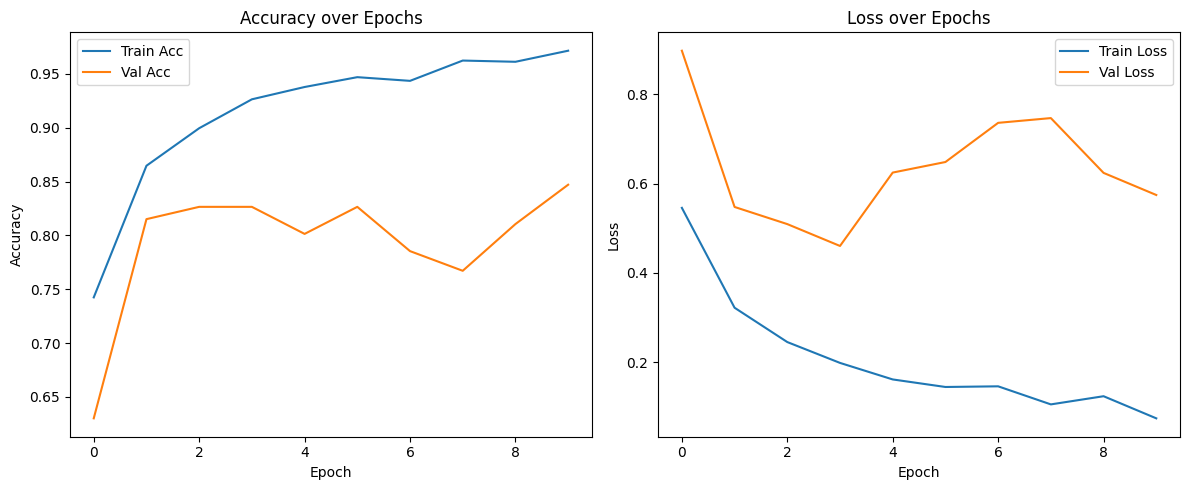

In [7]:
import os
import random
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, WeightedRandomSampler
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Reproducibility
random.seed(42)
torch.manual_seed(42)

# Paths
DATA_DIR = "/kaggle/working/train"  # Your dataset path

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transforms
common_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

augment_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(0.2, 0.2, 0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Custom dataset with class-specific transforms
class ImbalancedImageDataset(datasets.ImageFolder):
    def __getitem__(self, index):
        path, label = self.samples[index]
        image = self.loader(path)
        if self.classes[label] in ['Benign', 'Healthy']:  # Apply aug only to minority
            image = augment_transforms(image)
        else:
            image = common_transforms(image)
        return image, label

# Load dataset
dataset = ImbalancedImageDataset(DATA_DIR)
class_names = dataset.classes
num_classes = len(class_names)

# Count images per class
class_counts = [0] * num_classes
for _, label in dataset:
    class_counts[label] += 1

print("Class distribution:", dict(zip(class_names, class_counts)))

# Compute weights
class_weights = 1. / torch.tensor(class_counts, dtype=torch.float)
sample_weights = [class_weights[label] for _, label in dataset]
sampler = WeightedRandomSampler(sample_weights, len(sample_weights))

# Split into train & val
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Get class counts only from train_dataset
train_labels = [dataset[i][1] for i in train_dataset.indices]

# Count how many samples per class
class_counts = [train_labels.count(i) for i in range(len(dataset.classes))]
class_weights = 1. / torch.tensor(class_counts, dtype=torch.float)

# Assign weight to each sample in train_dataset
sample_weights = [class_weights[label] for label in train_labels]
sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)


# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Model
model = models.mobilenet_v3_large(pretrained=True)
model.classifier[3] = nn.Linear(model.classifier[3].in_features, num_classes)
model.to(device)

# Loss & Optimizer
loss_weights = class_weights.to(device)
criterion = nn.CrossEntropyLoss(weight=loss_weights)
optimizer = optim.Adam(model.parameters(), lr=0.0003)

# Training loop
EPOCHS = 10
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

for epoch in range(EPOCHS):
    # === Train ===
    model.train()
    train_loss, correct, total = 0.0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_acc = correct / total
    train_loss /= len(train_loader)
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)

    # === Validation ===
    model.eval()
    val_loss, correct_val, total_val = 0.0, 0, 0
    y_true, y_pred = [], []

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            correct_val += (preds == labels).sum().item()
            total_val += labels.size(0)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    val_acc = correct_val / total_val
    val_loss /= len(val_loader)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)

    # === Logging ===
    print(f"\n📊 Epoch [{epoch+1}/{EPOCHS}]")
    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"Val   Loss: {val_loss:.4f} | Val   Acc: {val_acc:.4f}")
    print("\nValidation Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

print("✅ Training complete!")

# === Plotting Accuracy and Loss ===
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['train_acc'], label='Train Acc')
plt.plot(history['val_acc'], label='Val Acc')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
# Save only the model weights
torch.save(model.state_dict(), '/kaggle/working/mobilenetv3_weights.pth')
print("✅ Model weights saved!")


✅ Model weights saved!


In [9]:
# Save full model
torch.save(model, '/kaggle/working/mobilenetv3_full_model.pth')
print("✅ Full model saved!")


✅ Full model saved!


In [10]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report
import numpy as np
import os

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Path to test data and saved model
TEST_DIR = '/kaggle/working/test'
MODEL_PATH = '/kaggle/working/mobilenetv3_weights.pth'  # or full_model.pth

# Same preprocessing as training (no augmentation)
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Load test dataset
test_dataset = datasets.ImageFolder(TEST_DIR, transform=test_transforms)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
class_names = test_dataset.classes
num_classes = len(class_names)

# === Load model ===
# If you saved weights only:
model = models.mobilenet_v3_large(pretrained=False)
model.classifier[3] = torch.nn.Linear(model.classifier[3].in_features, num_classes)
model.load_state_dict(torch.load(MODEL_PATH))

# If you saved full model:
# model = torch.load(MODEL_PATH)

model.to(device)
model.eval()

# === Testing ===
y_true, y_pred = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

# === Report ===
print("✅ Test Complete!\n")
print("📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/tmp/ipykernel_31/1488323642.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the function

✅ Test Complete!

📊 Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      0.01      0.03        73
     Healthy       1.00      0.38      0.55        72
        OPMD       0.38      1.00      0.56        73

    accuracy                           0.46       218
   macro avg       0.79      0.46      0.38       218
weighted avg       0.79      0.46      0.38       218



/tmp/ipykernel_31/2159518744.py:29: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(MODEL_PATH))


🧠 Predicted Class: Healthy


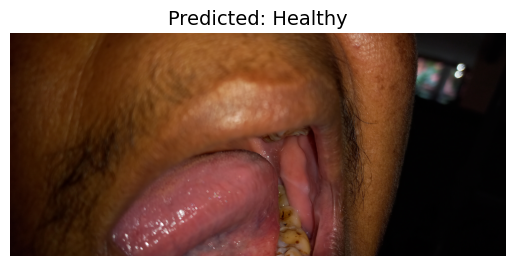

In [14]:
from PIL import Image
import torch
from torchvision import models, transforms
import matplotlib.pyplot as plt

# === Setup ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MODEL_PATH = '/kaggle/working/mobilenetv3_weights.pth'  # Change if needed
IMAGE_PATH = '/kaggle/working/test/Healthy/C-21-9-3.jpg'   # 🔄 Change to your image path

# === Class names (must match training order) ===
class_names = ['Benign', 'Healthy', 'OPMD']

# === Image Transform ===
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# === Load and Transform Image ===
image = Image.open(IMAGE_PATH).convert('RGB')
input_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension

# === Load Model ===
model = models.mobilenet_v3_large(pretrained=False)
model.classifier[3] = torch.nn.Linear(model.classifier[3].in_features, len(class_names))
model.load_state_dict(torch.load(MODEL_PATH))
model.to(device)
model.eval()

# === Predict ===
with torch.no_grad():
    output = model(input_tensor)
    _, pred_idx = torch.max(output, 1)

# === Get Class Name
pred_label = class_names[pred_idx.item()]
print(f"🧠 Predicted Class: {pred_label}")

# === Display Image with Prediction ===
plt.imshow(image)
plt.title(f"Predicted: {pred_label}", fontsize=14)
plt.axis('off')
plt.show()
